In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing data into dataframe
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [4]:
simpler_data_set = dataset[["Area", "Price"]]
simpler_data_set.head()

,Area,Price
0,720,4850000
1,600,4500000
2,650,6700000
3,650,4500000
4,665,5000000


In [5]:
simpler_data_set.shape

(6347, 2)

In [22]:
#Input, Output and No of training examples
original_x = simpler_data_set["Area"].to_numpy()
x = (original_x - np.mean(original_x)) / np.std(original_x)
print(x)
original_y = simpler_data_set["Price"].to_numpy()
y = (original_y - np.mean(original_y)) / np.std(original_y)
print(y)
m = simpler_data_set.shape[0]

[-0.51107459 -0.72677318 -0.63689877 ... -0.18752671  0.67526765
 -0.54702436]
[-0.5111666  -0.52852958 -0.41939089 ... -0.03244463 -0.54837297
 -0.61534444]


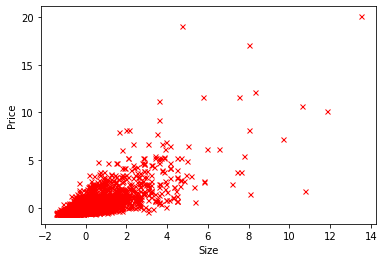

In [23]:
plt.plot(x, y, 'x', color = 'red', markersize = 5);
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

Hypothesis for simple one variable linear regression would be h<sub>θ</sub>(x) = θ<sub>0</sub> + θ<sub>1</sub>x

Cost function = 1/2m * Σ (h<sub>θ</sub>(x) - y)<sup>2</sup>

In [24]:
#initial thetas
theta0 = 0
theta1 = 0

#alpha
alpha = 0.001

cost_array = []
theta1_array = []

In [25]:
#hypo = theta0 + theta1 * x
#Cost Function
h_theta_x_i = theta0 + theta1 * x
initial_cost = 1/(2 * m) * (sum((h_theta_x_i - y) ** 2))
print(initial_cost)
cost_array.append(initial_cost)
theta1_array.append(theta1)

#Update theta
temp0 = theta0 - alpha * ((1/m) * (sum(h_theta_x_i - y)))
temp1 = theta1 - alpha * ((1/m) * (sum((h_theta_x_i - y)  * x)))
theta0 = temp0
theta1 = temp1

#New Cost Function
h_theta_x_i = theta0 + theta1 * x
cost = 1/(2 * m) * (sum((h_theta_x_i - y) ** 2))
print(cost)
cost_array.append(cost)
theta1_array.append(theta1)

0.5000000000000054
0.4994784918706947


In [26]:
#condition inital cost vs cost
iteration = 0 
while (abs(cost - initial_cost)) > 0.0000001:
    iteration += 1
    initial_cost = cost
    #Update theta
    temp0 = theta0 - alpha * ((1/m) * (sum(h_theta_x_i - y)))
    temp1 = theta1 - alpha * ((1/m) * (sum((h_theta_x_i - y)  * x)))
    theta0 = temp0
    theta1 = temp1
    
    #New Cost Function
    h_theta_x_i = theta0 + theta1 * x
    cost = 1/(2 * m) * (sum((h_theta_x_i - y) ** 2))
    if not(iteration % 100):
        print("After " + str(iteration) + ", Cost = " + str(cost))
    cost_array.append(cost)
    theta1_array.append(theta1)
print("Final Cost = " + str(cost))

After 100, Cost = 0.45226135728199707
After 200, Cost = 0.41360710531962397
After 300, Cost = 0.38196284719625484
After 400, Cost = 0.3560573123238403
After 500, Cost = 0.33484977652351794
After 600, Cost = 0.3174882521644606
After 700, Cost = 0.30327526056995124
After 800, Cost = 0.2916398116377157
After 900, Cost = 0.2821144649888855
After 1000, Cost = 0.2743165511044392
After 1100, Cost = 0.26793279803056397
After 1200, Cost = 0.26270674604895594
After 1300, Cost = 0.2584284447114184
After 1400, Cost = 0.2549260183292844
After 1500, Cost = 0.252058761071217
After 1600, Cost = 0.2497114842730848
After 1700, Cost = 0.24778988886983302
After 1800, Cost = 0.24621677704222683
After 1900, Cost = 0.24492895088592023
After 2000, Cost = 0.2438746735104864
After 2100, Cost = 0.24301159057114224
After 2200, Cost = 0.24230502873310583
After 2300, Cost = 0.24172660271144147
After 2400, Cost = 0.24125307492586756
After 2500, Cost = 0.24086542195848162
After 2600, Cost = 0.24054807031048753
After 

In [27]:
print(len(cost_array))
print(len(theta1_array))

4280
4280


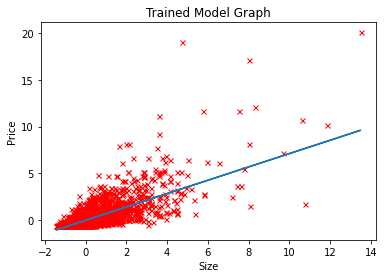

In [41]:
plt.plot(x, y, 'x', color = 'red', markersize = 5);
new_y = theta0 + theta1 * x 
plt.plot(x, new_y)
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Trained Model Graph")
plt.show()

In [39]:
#For new predictions
original_input_house_size = int(input("Any size of house : "))
input_house_size = (original_input_house_size - np.mean(original_x)) / np.std(original_x)
predicted_house_price = theta0 + theta1 * input_house_size
original_predicted_house_price = predicted_house_price * np.std(original_y) + np.mean(original_y)
print("Predicted Price : " + str(original_predicted_house_price))

Any size of house : 5000
Predicted Price : 118285730.49356978


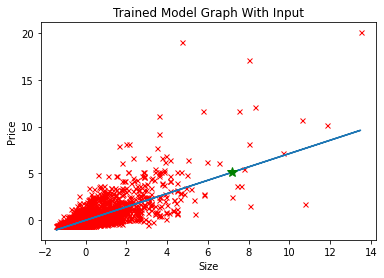

In [44]:
plt.plot(x, y, 'x', color = 'red', markersize = 5);
new_y = theta0 + theta1 * x 
plt.plot(x, new_y)
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Trained Model Graph With Input")
plt.plot(input_house_size, predicted_house_price, 'g*', markersize = 10)
plt.show()